# 1. [Define the Problem](#Define_the_Problem)

# 2. [Gather the Data](#Gather_the_Data)

# 3. [Prepare Data for Consumption (data wrangling)](#Prepare_Data)
> ## 3.1. [Import Libraries](#Import_Libraries)
>> ### 3.1.1. [Load Data Modelling Libraries](#Load_Data)
> ## 3.2. [Generate the data](#generate)
>> ### 3.2.1. [Blobs](#blobs)
>> ### 3.2.2. [Moons](#moons)
>> ### 3.2.3. [3d-Ring](#3dring)
>> ### 3.2.4. [Iris](#iris)
> ## 3.3. [Meet and Greet Data](#Meet_Data)
>> ### 3.3.1. [Load Data](#load)
>> ### 3.3.2. [Data Statistics](#stats)
>> ### 3.3.3. [Feature Selection](#feature_select)
> ## 3.4. The 4 C's of Data Cleaning
>>  ### 3.4.1. [CORRECTING](#correct)
>>  ### 3.4.2. [COMPLETING](#completing)
>>  ### 3.4.3. [CREATNG](#create)
>>  ### 3.4.4. [CONVERTING](#convert)
> ## 3.5. XY
>>  ### 3.5.1. Define XY
>>  ### 3.5.2. Final check
>>  ### 3.5.3. Split Training and Testing Data
>>  ### 3.5.4. [PCA](#PCA)
# 4. [Perform Exploratory Analysis with Statistics](#eda)
> ## 4.1. Discrete Variable Correlation by Survival
# 5. [ Model Selection](#model)
> ## 5.1. [Regression](#regression)
>> ### 5.1.1 [Linear Regression](#linregression)
> ## 5.2. [Classification](#classification)
>> ### 5.2.1. [Logistic Regression](#logistic_regression)
>> ### 5.2.2. [KNN](#knn)
>>> #### 5.2.2.1. [Facial Recognition with PCA](#facial_knn_pca) 
>>  ### 5.2.3. [Decision Tree](#DT_C)
>>  ### 5.2.4. [SVC](#SVCC)
>>  ### 5.2.5. [Naive Bayes](#NB)
>>  ### 5.2.6. [Ensemble](#ensemble)
>>>   #### 5.2.6.1. [Voting](#voting)
>>>   #### 5.2.6.2. [Bagging](#bagging)
>>>   #### 5.2.6.3. [Random Forest](#RF_C)
>>>   #### 5.2.6.4. [AdaBoost](#adaboost)
>>>   #### 5.2.6.5. [XGBoost](#xgboost)
> ## 5.3. [Clustering](#clustering)
>> ### 5.3.1. [KMeans](#kmeans)
>> ### 5.3.2. [DBSCAN](#dbscan)
> ## 5.4. [Common techniques](#common)
>> ### 5.4.1. [Cross validation](#crossval)
# 6. Validate and Implement Data Model
# 7. Optimize and Strategize
# Appendix
> ## A.1. [Functions](#functions)
> ## A.2. [Create your own metric](#metric)
..................................................

General steps:

1. Define the Problem / 2. Gather the Data / 3. Prepare Data for Consumption (data wrangling)
4. Perform Exploratory Analysis / 5. Model Data / 6. Validate and Implement Data Model
7. Optimize and Strategize
 
1. Define Model / 2. Fit / 3. Predict / 4. Evaluate

<a id='Define_the_Problem'></a>
# 1. Define the Problem

What is given, what you want

<a id='Gather_the_Data'></a>
# 2. Gather the Data

Kaggle, UCI, ...

<a id='Prepare_Data'></a>
# 3. Prepare Data for Consumption (data wrangling)

<a id='Import_Libraries'></a>
## 3.1. Import Libraries


In [1]:
%matplotlib inline
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# If need the versions:
# print("pandas version: {}". format(pd.__version__))

<a id='Load_Data'></a>
### 3.1.1. Load Data Modelling Libraries

In [6]:
# Common Model Algorithms
    ## Regression
from sklearn.tree import DecisionTreeRegressor

    ## Classifier
from sklearn.tree import DecisionTreeClassifier
    
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, \
                    ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,

# Common Model Helpers
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
    ## Regression:
from sklearn.metrics import r2_score
    ## Classification:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
                            roc_curve, auc, precision_recall_curve, average_precision_score



# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix



<a id='generate'></a>
## 3.2. Generate the data

<a id='blobs'></a>
### 3.2.1. Blobs

In [4]:
# S1.1: Data Generation
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

# S1.2: Plot Data
plt.scatter(X[:,0], X[:,1])

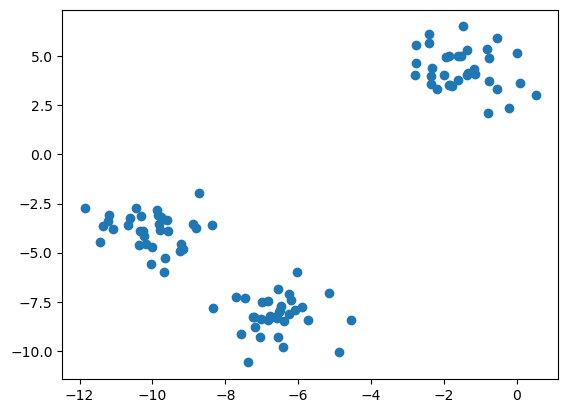

<a id='moons'></a>
### 3.2.2. Moons

In [41]:
# make_moons will generate two moon-shaped datasets
# return an attribute matrix with 2 columns, and a target array

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X.shape, y.shape # = (500, 2), (500,)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train)

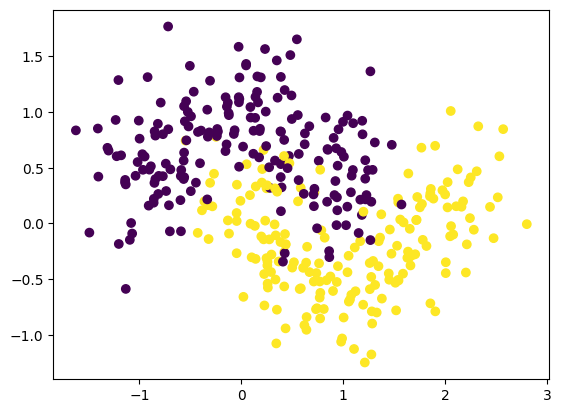

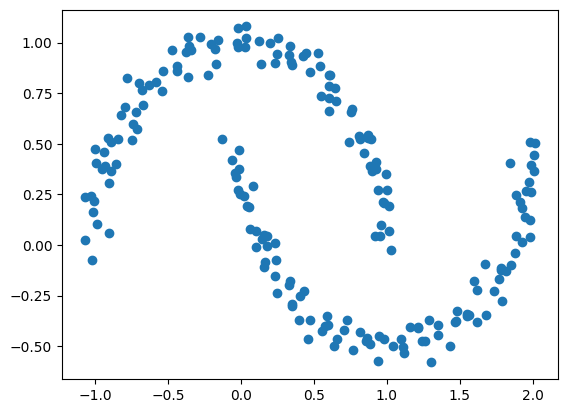

<a id='3dring'></a>
### 3.2.3. 3d_Ring

In [ ]:
# S0 Data Generation:
# The data points follow a ring-shape (on the x, y plane), but a bit tilted (on the z axis)

np.random.seed(4)
m = 60  # number of observations
w1, w2 = 0.1, 0.3
noise = 0.1

## Prep for 3D data generation
X = np.empty((m, 3))

## The "Ring"
angles = np.random.rand(m) * 3 * np.pi / 2  - 0.5
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2

## The "Tilt"
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
# Visualize the data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

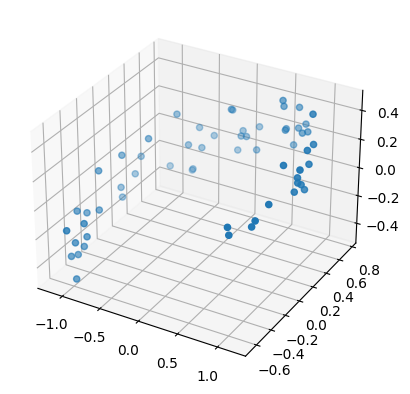

<a id='iris'></a>
### 3.2.4. Iris

<class 'numpy.ndarray'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


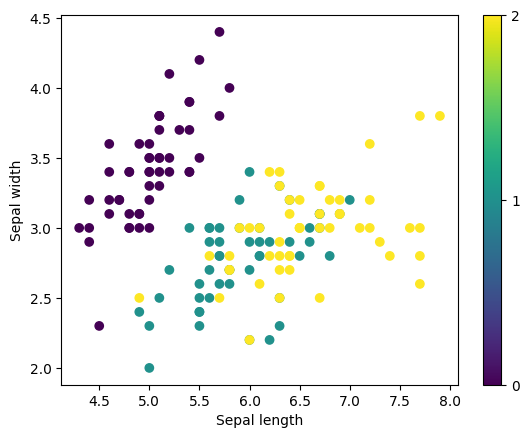

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.target_names) # three classes
print(iris.feature_names)

########### First Data Visualization: #############################
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar(ticks = [0,1,2]) # Y has 3 different numbers so here we set 3 different ticks

<a id='cancer'></a>
### 3.2.5. Cancer

In [ ]:
# Using skitlearn datasets:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # a dictionary

cancer.data.shape
cancer.target_names
cancer.feature_names
cancer.DESCR

<a id='Meet_Data'></a>
## 3.3. Meet and Greet Data

<a id='load'></a>
### 3.3.1. Load data

In [5]:
df = pd.read_csv('data.csv'), # usecols=list(range(1,25))) # If the first col is just number of rows
df = pd.read_excel('data.xlsx')
                 
X = df.iloc[:,:].values  # for clustering

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values # for regression / classification

######################################################
# If we have two separate data file: train.csv, test.csv: and make it prettier!
                 
directory = "data/"
feature_tables = ['train.csv', 'test.csv']

df_train = directory + feature_tables[0]
df_test = directory + feature_tables[1]

# Create dataframes
print(f'Reading csv from {df_train}...')
train = pd.read_csv(df_train)
print('...Complete')

print(f'Reading csv from {df_test}...')
test = pd.read_csv(df_test)
print('...Complete')
                 
#################################################
                 
cols = ['col1','col2','col3']
X = df[cols]
# And if we needed np array:
X = X.to_numpy()

<a id='stats'></a>
### 3.3.2. Data Statistics

In [ ]:
X.describe()

my_perc = [0.01, 0.5, 0.75, 0.99]
df.describe(percentiles = my_perc)

df.info()
df.head()
df.tail()
df.sample(10)
df.shape
df.dtyepes
df.columns
stats.iqr(data)


# Find data that are Nan:
# 1. show the number of null in each column
df.isna() >>> df.isna.sum()
# 2. show those columns that have nan:
df[
    df.isna().any(axis=1)
]
# 3.
df.info()
# 4.
df.col.value_counts(dropna=False)
# 5. Find columns that include missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

# All rows/cols such that a particular col is not null:
df.loc[df.col.notnull()]

# set the precision for numpy arrays using.
np.set_printoptions(precision=4, suppress=True)
# True means to print the output as fixed point notation

# If we have only 1 ind variable, we need to have a 2d dataframe
# for fitting. So:
house_X = house['LOT_SQFT']
house_X = house_X.to_frame() # So: (10,) >> (10,1)
# OR:
house_X = house[['LOT_SQFT']]

# Box plots:
fig, ax = plt.subplots(1,10, figsize=(25,8)) # 10 is number of features
for i in range(10):
    ax[i].boxplot(data.iloc[:,i])

outliers: 
1. identify and remove: they are noise or invalid
2. keep them but use robust methods to lessen their impact: they are unusual but still valid data

<a id='feature_select'></a>
### 3.3.3. Feature Selection

In [3]:
from sklearn.feature_selection import VarianceThreshold

# Drop a col:
new_df = df.drop(['col1'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# If want to split the same way: add random state

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

### Using VarianceThreshold from Scikit-learn

In [ ]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

## 3.4. The 4 C's of Data Cleaning

<a id='correct'></a>
### 3.4.1. CORRECTING

In [ ]:
df = df.drop_duplicates() # duplicate rows
df.dropna(axis= 0 or 1) #0: rows / 1:columns

# Removing observations including Nan:
df_cleaned = df.dropna() # default is axis 0

############################ feature scaling ###############################

# (Standardization(Z-score) / Normalization)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_standardized = sc_x.fit_transform(X_train) # No index choosing in ann
# Now X_train_standardized is a numpy array. To use describe we should convert it
# back to pd df:
new_dataframe = pd.DataFrame(X_train_standardized, columns = cols)

# If we want an interpolation, we do similarly on dependent parameter

dataz = (data - datamean)/datastd
# or
from scipy import stats
dataz = stats.zscore(data)


# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

<a id='completing'></a>
### 3.4.2. COMPLETING

In [ ]:
########################### Imputation: (fill blanks) ########################

data1.drop(drop_column, axis=1, inplace = True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:3]) # so columns 1,2 have nan values in them / better to include all numerical cols
X[:,1:3] = imputer.transform(X[:,1:3])
# or: imputr.fit_transform

# fill a col with median: (when work with panda series better use this method)
df['col1'].fillna(df['col1'].median(), inplace=True)


# Simple Imputer

# Put back columns after imputation (as we lose them during imputation):
imputed_X_train = ...
imputed_X_train.columns = X_train.columns



<a id='create'></a>
### 3.4.3. CREATNG

In [ ]:
# Create a new col based on age with 5 bins with same range:

df['col_Bin']=pd.cut(df['col'], 5)

<a id='convert'></a>
### 3.4.4. CONVERTING

In [ ]:
######################## Categorical to numerical (dummy) #################
# We can use:
# pd.get_dummies:
features = ['categorical1', 'categorical2'] 
X_train = pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])

# ------------ #

# onehotencoding (Nominal data, no order)
from sklearn.preprocessing import OneHotEncoder
catvar = ['cat_var1', 'cat_var2']
X_cat = df[catvar]

my_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# handle_unknown: assign 0 to all the dummies when missings are found
# sparse: return a sparse matrix or not
X_encoded = pd.Dataframe(
    my_encoder.fit_transform(X_cat).toarray()
)
print(my_encoder.categories_)
# This shows all the categories. The variables are generated based on the order
# of the specific array.
X_all = pd.concat([X_cat_conv, X_num], axis=1)
# ------------ #

# label encounter (Nomina data, no order)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# ------------ #

# OrdinalEncoder (Ordinal data, has order)
from sklearn.preprocessing import OrdinalEncoder

catvar = ['cat_var3', 'cat_var4']
X_cat = df[catvar]

my_encoder_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = 999)
# when there are missing values, it won't raise error but assign 999 to the new variable
X_encoded_ord = my_encoder_ord.fit_transform(X_cat)



######################################### OR:

def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def process_data(df):
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Class'] = df['Class'].apply(transform_class)
    
    return df

train = process_data(train)
test = process_data(test)

<a id='PCA'></a>
## PCA

__n_components__: can be integer or float.<br>
If integer, then n_components is the number of components to keep;
If float, then n_components is the percentage of variance explained.<br>
__copy__: whether to keep the original dataset. Default is True (recommended setting). If False, then the new variables will overwrite the original variable.<br>
__whiten__: bool. Default is False. If True, then new variables have variance = 1.<br>
__random_state__: technical reasons

-------------------------------------------------------------------------
__.fit_transform(X)__: train the model, and produce the new variables (with dimension reduction) directly<br>
__.inverse_transform(Xnew)__: To transfer the new data back to the original data

-------------------------------------------------------------------------
__.components___:
It shows how the new variables are generated. Recall that the new variable is a linear transfer of the original variables, the output of .components_ is the coefficients of the linear transfer<br>
__.explained_variance_ratio___: It shows the percentage of variance explained (kept) by each new variable.

1. After the transfer, what is the proportion of variance in the original dataset included?<br>
2. Suppose I want to keep more than 95% of the information, is the transfer proper?<br>
3. Can you write down the relationship between the new Xs and the original Xs?<br>

In [ ]:
# S0: generate data >> look at 3d-Ring generated data

In [ ]:
# S1: Apply PCA
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 2, random_state = 0, whiten = True)
X2D = pca2.fit_transform(X)
print("Before transfer, the dimension is:", X.shape[1], "\n",  # 3
      "After transfer, the dimension is:", X2D.shape[1])       # 2

In [ ]:
# S2: Finding the "explained variance", or the information kept after transfer
pca2.explained_variance_ratio_   # array([0.84248607, 0.14631839])

In [ ]:
# suppose keep 95% total info, how many components to keep?
# Answer: 2
# first component: 84% < 95%, need more than 1 component
np.sum(pca2.explained_variance_ratio_) # 0.988804464429311
# first 2 components: 98.9>95 => keep 2 components

In [ ]:
# S3: Finding the transfer: how to get PCs
pca2.components_ # 2 rows, because 2PCs kept; 3 columns, because initial X has dimension 3

In [ ]:
# Suppose the original variables are X1, X2, X3, correspondingly
## Then: 
## X1_new = -0.936X1 -0.299X2 - 0.185X3
## X2_new = 0.340X1 - -0.901X2 - 0.268X3

## 1.? Feature selection

#### Removing constant features

In [6]:
### Varaince threshold sklearn ###
# +: stores constant features
# -: only numerical values

### std, pandas ###
# +: quick
# -: no constant features storing, only numerical values

### nunique, pandas ###
# +: quick, both numerical and categorical
# -: no constant features storing, only numerical values


<a id='eda'></a>
# 4. Perform Exploratory Analysis with Statistics

## 4.1. Visualization
### 4.4.1. Univariate

In [ ]:
# HISTOGRAM 1
x = df['col1']
plt.hist(x, bins=15, color = 'r')
plt.xlabel("Sales Price")
plt.ylabel('Frequency')

# or by log/sqrt transfer:
log_x = np.log(x)
sqrt_x = np.sqrt(x)
plt.hist(log_x or sqrt_x, bins=20)

# HISTOGRAM 2
# Overlapped hists using sns:
high_qual = df['OverallQual'] > 6
# Second, put it to dataframe
df['High_Quality'] = high_qual
# OR:
df['High_Quality'] = df['OverallQual'] > 6  # So we have a col with T,F
sns.histplot(data = df, x = 'SalePrice', hue = 'High_Quality')

# BOXPLOT 1
x1 = df['SalePrice']
plt.boxplot(x1)

# BOXPLOT 2
sns.boxplot(data = df, x = 'OverallQual', y = 'SalePrice')
# Here if we have 1 to 10 number of OverallQual for each observation,
# It plots a different boxplot for that particular OverallQual

sns.boxplot(data=data, orient='v')

### Histogram using pandas

In [ ]:
m = [
[2,5,4,3],
[1,1,8,6]
]

df = pd.DataFrame(
m,columns=['prop 0','prop 1','prop 2','prop 3']
)

fig, ax = plt.subplot(1,2) # correct?

df.plot(ax=ax[1,0],kind='bar')
df.T.plot(ax=ax[1,1],kind='bar')

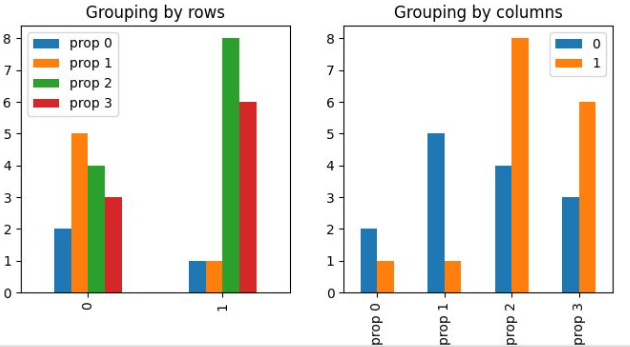

### Histogram using sns, same col, overlapped

In [ ]:
# First we add a new col of true, false based on any col that you want, then use it in the hue parameter.

df['High_Quality'] = df['OverallQual'] > 6

sns.histplot(data = df, x = 'SalePrice', hue = 'High_Quality')

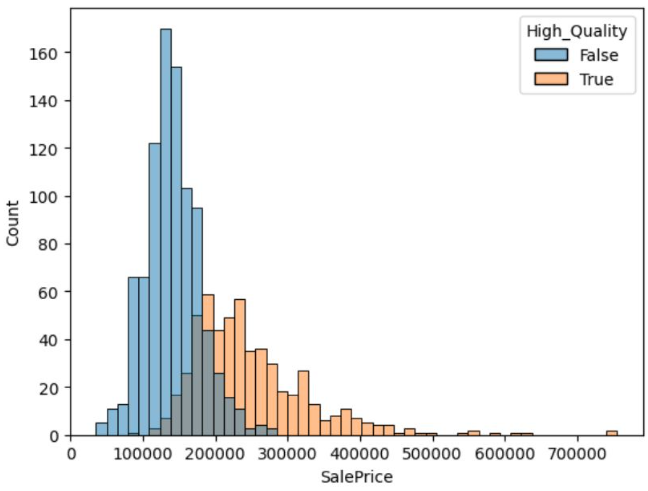

We want to make this histogram better by converting it to line plot:

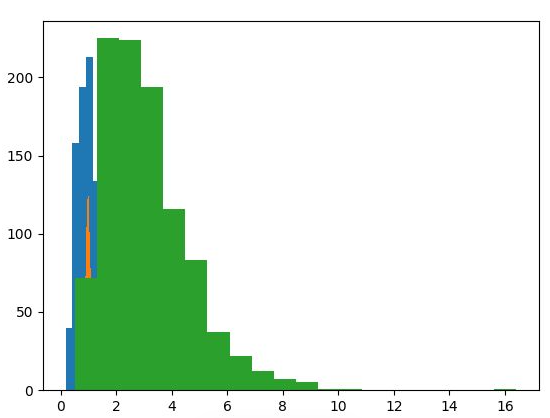

In [ ]:
k = 20
# histogram discretization for the datasets
y1,x1 = np.histogram(data1,bins=k)
xx1 = (x1[0:-1] + x1[1:]) / 2 # getting the center of bins
y1 = 100*y1 / sum(y1) # convert to probability

#... similar for two other sets ...

# show the plots
plt.plot(xx1,y1,'s-',label='data1')
plt.plot(xx2,y2,'o-',label='data2')
plt.plot(xx3,y3,'^-',label='data3')

plt.legend()
plt.show()

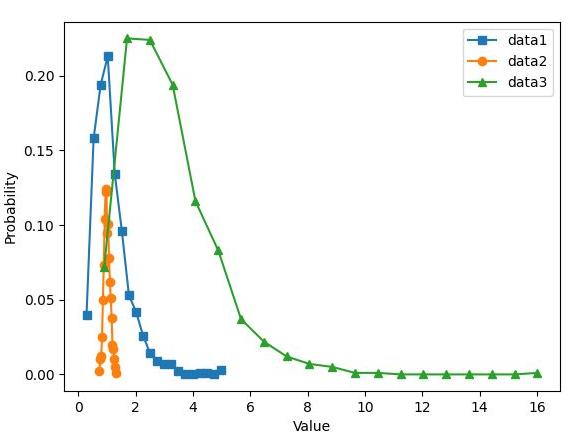

### 4..2. Multivariate

In [ ]:
# CORRELATION MATRIX
# Ex: Create a correlation matrix of the following variables:
var = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF']
# ANS:
my_corr_matrix = df[var].corr() # this a matrix with all those corr values
# Use a heatmap to visualize the correlation of the above-mentioned variables 
sns.heatmap(my_corr_matrix )

# SCATTER 1: (x-y)
x = df['GrLivArea']
y = df['SalePrice']
plt.scatter(x, y, c = 'red', alpha = 0.3) # color: c
plt.xlabel('Area')
plt.ylabel('Price')

# SCATTER 2: (x-y-z)
# Scatter plot with color
x = df['GrLivArea']
y = df['SalePrice']
qual = df['OverallQual']
plt.scatter(x,y, c = qual) # color: c
plt.xlabel('Area')
plt.ylabel('Price')
plt.colorbar()

### Scatter plot of feature-feature plots when features are limited

In [35]:
from pandas.plotting import scatter_matrix

iris_dataframe = pd.DataFrame(X, columns=iris.feature_names[:2])

grr = scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

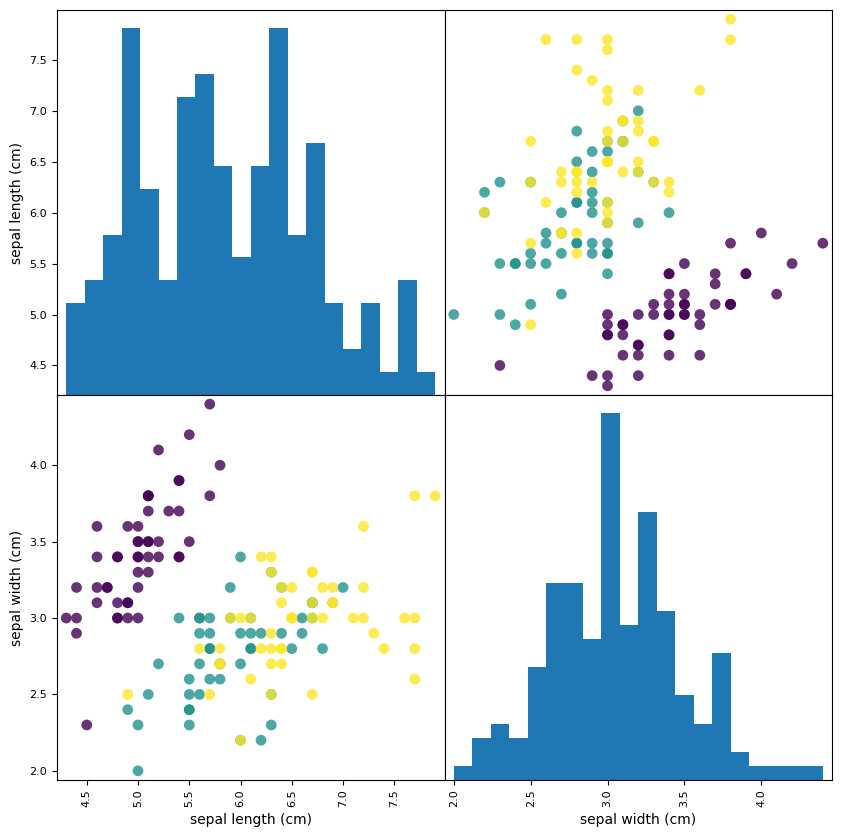

<a id='model'></a>
# 5. Model Selection

<a id='regression'></a>
## 5.1. Regression

<a id='linregression'></a>
### 5.1.1. Linear Regression

In [ ]:
# Problem: predict house price
var = ['FLOORS', 'ROOMS']
house_X = house[var]
house_y = house['TOTAL_VALUE']


# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house_X, house_y, test_size = 0.3, random_state = 42)


# Linear Regression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting:
model.fit(X_train, y_train)

# Model Coefficients:
model.coef_
model.intercept_

# Predictions:
y_pred_test = model.predict(X_test # or sc_x.transform(X_test)) 
# Or single:
X_new = [[2, 6]]
y_pred_single = model.predict(X_new)


# Evaluation:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

e = y_test - y_pred_test

MAE_test = np.mean(np.abs(e))
MSE_test = np.mean(e**2)
RMSE_test = MSE_test**0.5

# Or simply:
MAE_test = mean_absolute_error(y_test, preds_y)
MSE_test = mean_squared_error(y_test, preds_y)

r2_score(y_test, y_pred_test)
model.score(X_test, y_test) #score is r2 here.
# Note the different arguments

## 5.1.2. Polynomial Regression

In [ ]:
house = pd.read_csv('house.csv')
house_X = house[['LOT_SQFT']] # It is 2d, good!
house_y = house['TOTAL_VALUE']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    house_X, house_y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import PolynomialFeatures
# Define polynomial generation function and set the degree.
# Means: for 1 variable change x to x^0, x^1, x^2, x^3
poly = PolynomialFeatures(degree = 3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly_train, y_train)
y_pred_test = lr.predict(X_poly_test)

# Evaluation:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

e = y_test - y_pred_test

MAE = np.mean(np.abs(e))
MSE = np.mean(e**2)
RMSE = MSE**0.5

# Or simply:
MAE = mean_absolute_error(y_test, y_pred_test)
MSE = mean_squared_error(y_test, y_pred_test)

r2_score(y_test, y_pred_test)
lr.score(X_poly_test, y_test) #score is r2 here.
# Note the different arguments

# Model Coefficients:
lr.coef_
lr.intercept_
# first coef (x^0 = 1) is zero, 
# it is the intercept, which duplicates with lr.intercept_
# separately estimated

### 5.1.2.1. Finding best degree: Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

# S1: Define models, polynomial transfer first, then linear regression
poly_transfer = PolynomialFeatures(degree = 3)
my_lr = LinearRegression()

# S2. Apply polynomial regression in pipeline
my_poly_reg = make_pipeline(poly_transfer, my_lr)
my_poly_reg.fit( X_train , y_train)
# So no need to first convert X to poly terms and then fit the model

y_poly_test_pred = my_poly_reg.predict(X_test)
MSE_poly = np.mean((y_test - y_poly_test_pred)**2)
############
my_poly_reg.named_steps # what models you have in the pipeline (dict)
my_poly_reg.named_steps['linearregression'].coef_
my_poly_reg.named_steps['linearregression'].intercept_

### 5.1.2.2. Polynomial Regression with Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures() # We want to try different degrees, so no option here 
lr = LinearRegression()
model = make_pipeline(poly, lr) # Put them in a pipeline

grid = { 'polynomialfeatures__degree'  : [1, 2, 3, 4, 5] }
# 2 underscore when using pipeline
grid_search = GridSearchCV(model, grid, cv = 5)
grid_search.fit(X_train, y_train)

grid_search.predict(X_test)
# prediction is based on the best degree of polynomial features found during the grid search

grid_search.score(X_test, y_test) # this is the unbiased performance measure
# this is not validation score.
# This means model has not seen this y_test, it is the test set not
# the validation/training set

# OUTPUTS:
grid_search.best_params_ # the choice of hyperparameter
grid_search.best_score_ #the mean validation score of the best model. The best model's performance measure, based on which the model is chosen.
grid_search.cv_results_ #detailed results (time, score of each hyperparameter, each iteration). Dict
grid_search.best_estimator_  # polynomial, linear reg


For the sake of plotting, we need: <br>
grid_search.cv_results_ <br>
as like: <br>
results = pd.DataFrame(grid_search.cv_results_)[
    ['params', 'mean_test_score', 'std_test_score']]
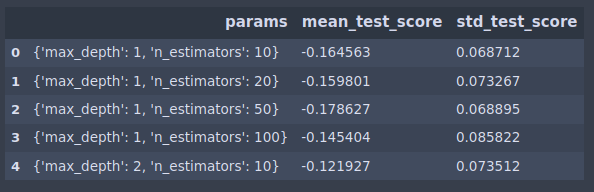

### 5.1.2.3. Ridge Regression & LASSO

In [ ]:
var = ['GROSS_AREA', 'ROOMS', 'LIVING_AREA', 'LOT_SQFT', 'FLOORS', 'FULL_BATH']
X = house[var] # DataFrame
y = house['TOTAL_VALUE'] # Series

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

from sklearn.linear_model import Ridge, Lasso # Replace all Ridge with Lasso and you're good!
ridge = Ridge(alpha = 1) #alpha = ?
ridge.fit(X_train, y_train)

y_test_pred = ridge.predict(X_test)
MSE_test = np.mean((y_test - y_test_pred)**2)
# OR
MSE_test = mean_squared_error(y_test, y_pred_test)
r2 = ridge.score(X_test, y_test)

ridge.coef_, ridge.intercept_

########################## Now with grid search ####################

ridge = Ridge() # Now, we don't specify the alpha
param_grid = { 'alpha' : [0.001, 0.01, 0.1, 1, 10,100] }
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

grid_ridge.score(X_test, y_test) # r2
grid_ridge.best_score_           # r2 (mean on different cv sets)

grid_ridge.best_params_          # {'alpha': 1}
grid_ridge.best_estimator_       # Ridge(alpha=1)

grid_ridge.best_estimator_.coef_        # Here 6 numbers as we had 6 features
grid_ridge.best_estimator_.intercept_   # single number of course!

### 5.1.3. Decision tree

In [2]:
from sklearn.tree import DecisionTreeRegressor


# Defining a function:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
    model.fit(X_train, y_train)
    preds_y = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_y)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)

print(my_mae)



### 5.1.4. Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting feature importance
feature_importances = rf_regressor.feature_importances_

# Sort features and importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

features = X_train_standardized.columns  # Assuming X_train_standardized is a DataFrame
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances for Random Forest Regressor")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

### 5.1.5. KNN

In [ ]:
### KNN
from sklearn.neighbors import KNeighborsRegressor

### 5.1.end. Metrics

__r2_score:__

<a id='classification'></a>
# 5.2. Classification

<a id='logistic_regression'></a>
## 5.2.1. Logistic regression

l2 regularization is default. Use penalty = 'none' to turn it off.<br>
__.coef___, __.intercept___ : coefficient estimates<br>
__.predict_proba__ : predicted probability

In [3]:
# S0: load dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.feature_names
cancer.target_names

X = cancer.data
y = cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(np.mean(y_train), np.mean(y_test), np.mean(y)) 
# we need a comparable portion of 1s for y / to check if dataset is imbalanced or not

# S1: Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

model.coef_  # here we can say by what % or factor, log odds or odds changes
model.intercept_
model.score(X_test, y_test) # default = accuracy
# OR:
sklearn.metrics.accuracy_score(y_test, y_pred)


y_test_pred = model.predict(X_test)
acc_manual = np.sum(y_test == y_test_pred) / y_test.shape[0]

# Suppose of a model that predicts everything = 1: It's accuracy would be
Acc_Ones = np.sum(1 == y_test)/y_test.shape # or simply:
np.mean(y_test)


### confusion_matrix, accuracy_score ####
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred) # rows = actual, cols = predicted / upper left corner = TN (predict = actual = 0)
# For all other metrics, the inputs are Actual_y, Predicted_y


################# Grid Search CV ##########################

param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg'],  # Solver
    'max_iter': [100, 200, 300],  # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance
    'class_weight': [None, 'balanced']  # Class weights
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

<a id='knn'></a>
## 5.2.2. KNN

In [ ]:
# S0: dataset

#Iris

##########################################################

# S1: Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=2) # p=2: euclidean distance (default), p=1 manhattan distance.
model.fit(X_train, y_train)

model.score(X_test, y_test) #score = accuracy
X_new = [[5, 5]]
model.predict(X_new)
model.kneighbors(X_new) # distance of three closest neighbors; row index of the neighbors

################# Grid Search CV ##########################

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(3, 26, 2) }
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

grid_knn.best_params_
grid_knn.best_score_

grid_knn.best_estimator_.kneighbors(X_new)  # grid_knn.best_estimator_ = model


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

<a id='facial_knn_pca'></a>
### Facial Recognition with PCA

5749 people and 13233 pictures<br>
Each picture: 5828(?) features, and each feature is a real number between 0 and 255.
(With resize=1 the shape is: 125*94=11750 and resize=0.7 means we have 0.7*125, 0.7*94)

-------------------------------------------------------

__min_faces_per_person__: minimum number of faces required for a person (class label) to be included.<br>
__resize__: float, the factor used to resize the image (closer to 1 => more features)

In [3]:
# Load the Data
## For the first time, the code may take several minutes to run
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [13]:
# Check features

print("keys:", people.keys())
print("target shape:", people.target.shape)

# keys: dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
# target shape: (3023,)

keys: dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
target shape: (3023,)


In [14]:
# Check features

print("data shape:", people.data.shape)
print("image shape:", people.images.shape) # cutting picture into tiny squares, 87 rows, 65 columns (pixels)

# 3023 pictures, each picture described by 87*65=5655 features/pixels. 
# feature/pixel: a real number between 0 and 255, a grey level channel
# if we set the parameter color = True, it will use a RGB channel to represent each pixel, -> 3023 * 87 * 65 * 3


data shape: (3023, 5655)
image shape: (3023, 87, 65)


In [15]:
# Check features

print('target_names shape:', people.target_names.shape)
print('target_names examples:', people.target_names[0:5])
# 3023 pictures, each picture described by 87*65=5655 features. 62 unique people (classes)
# complicated multi classification problem
# target_names: names of all persons in the dataset

target_names shape: (62,)
target_names examples: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie']


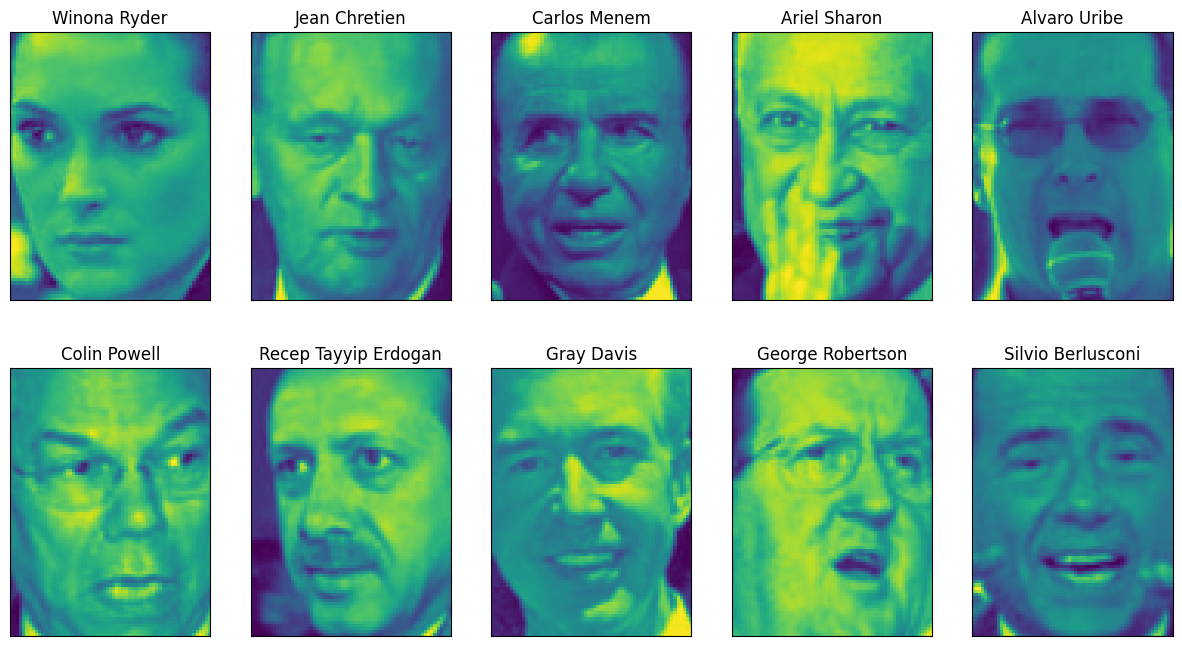

In [18]:
# Check a couple of pictures

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
# 10 subplots
# remove xticks and yticks
    

# zip for parallel iteration, each item is a tuple
# axes.ravel() flattens the 2*5 2D-array to 1D-array for easier iteration
# cmap='viridis' maps scalar data to colors
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='viridis')
    ax.set_title(people.target_names[target])

In [ ]:
# count unique values
unique, counts = np.unique(people.target, return_counts=True)
print(counts)

In [ ]:
# Data for Analysis
X = people.data
y = people.target

from sklearn.model_selection import train_test_split

# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
#stratify is guarantee y_train proportions consistent with y proportions

Nearest Neighbor Classification with PCA<br>
Using KNN as an example, let's see how PCA would influence the classifiers' performance.<br>
For simplification, we do not seek the best k, instead, let k=1. We will start by a classifier without PCA.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn is:", knn.score(X_test, y_test)) # 0.301

### Scaling Data (II)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1)) # Scale to range 0 to 1, which is default
## equivalent to MinMaxScaler()

# Train our scaler
minmax.fit(X_train) # obtaining min and max for X_train

# Get scaled variables
X_train_scaled = minmax.transform(X_train) # use same scaler (i.e., min and max from X_train) to scale
X_test_scaled = minmax.transform(X_test)
X_train_scaled

# Below is incorrect: here scaling separately
# minmax.fit_transform(X_train), minmax.fit_transform(X_test) # this is wrong

In [ ]:
# We can also do the scaling manually. The result might differ slightly
X_manual_train = X_train/255 # assuming X_train|min = 0, X_train|max = 255
# For computer vision only, where all vars will be [0,255]
X_manual_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
print("Test set score of 1-nn is:", knn.score(X_test_scaled, y_test)) # 0.308
# Inside the () should be similar to what we have in the above ()

### PCA

Initially: # of features: 5655, training sample size ~ 2000, n_PCA = 100 is a good choice.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,  whiten=True, random_state=0) # whiten:consider as scaling to var = 1

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)   # (2267, 100)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: ", knn.score(X_test_pca, y_test))   # 0.447

In [ ]:
np.sum(pca.explained_variance_ratio_) # 0.893
# performance improves with less info
# Dimension reduces by 5400, but keeps around 90% of info.

In [ ]:
pca.components_ 
# n_components * n_features
# coefficients to get PCs, each PC is a linear combination of features
# principal components coefficients are eigenvectors of the coraviance matrix
# we can plot the eigenvectors pixel by pixel and get eigenfaces
# PC1: [top left cell: color = -0.0047, ...] (coloring a picture grid by grid, based on coef.)
# to get the PC values for one image: dot product of the image and each eigenvector(eigenface)

#### Visualizing Components

In [ ]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

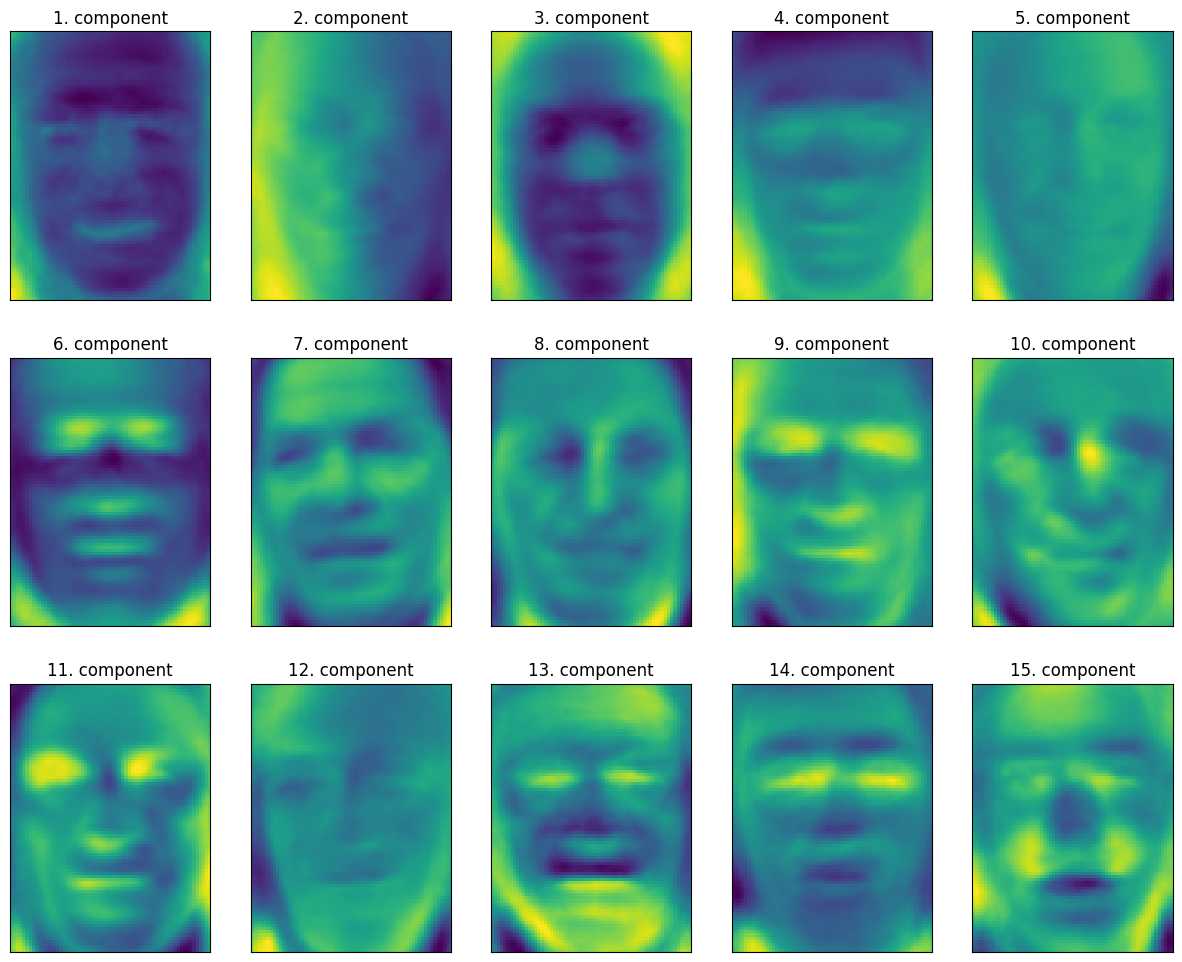

<a id='DT_C'></a>
## 5.2.3. Decision Tree

Same Dataset that we used in logistic regression (breast cancer). Check that out.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_full = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # default for criterion is 'gini'
# others: max_features, max_depth, max_leaf_nodes, min_samples_leaf, min_samples_split

dt_full.fit(X_train, y_train)
dt_full.score(X_train, y_train), dt_full.score(X_test, y_test)

# Plotting feature importance
dt_x = cancer.feature_names
dt_y = dt_full.feature_importances_
plt.barh(dt_x, dt_y)

# droping those with imp = 0:
imp = dt_y > 0
plt.barh(dt_x[imp],dt_y[imp])


################# Grid Search CV ##########################

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
dt_params = {'max_depth':         range(1,10),
             'min_samples_split': range(2,11),
             'max_leaf_nodes':    range(2,11)}
grid_tree = GridSearchCV(tree, dt_params)
grid_tree.fit(X_train, y_train)

grid_tree.best_params_
grid_tree.best_estimator_.score(X_test, y_test) # score = accuracy under the best model
                                                # for the test dataset

y_grid_pred = grid_tree.best_estimator_.predict(X_test)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

################## Visualization ##########################

from sklearn import tree
tree.export_text(grid_tree.best_estimator_) # inside () the model(model name can't be tree!)

fig = plt.figure(figsize=(20,10))
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = cancer.feature_names.tolist(), # specify variable names 
               class_names = cancer.target_names.tolist(), # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()

<a id='SVCC'></a>
## 5.2.3. SVC

We use __cancer__ dataset, and the __iris__ dataset that we used above

In [ ]:
################# Linear SVC #####################

# C: hyper parameter, how much margin violation is acceptable.
# Large C: hard margin, Small C: more violation is acceptable

from sklearn.svm import LinearSVC
lr_svc = LinearSVC(random_state = 0)
lr_svc.fit(X_train, y_train)
lr_svc.score(X_train, y_train), lr_svc.score(X_test, y_test)
lr_svc.coef_ #especially if we have small # of features, we can use these coef. easier


################# Grid Search CV ##########################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state = 0) # must specify random state here
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]   }

grid_lrsvc = GridSearchCV(linear_svc, params_svc, n_jobs = 2)
grid_lrsvc.fit(X_train, y_train)

grid_lrsvc.best_params_
grid_lrsvc.best_score_ # this is the avg of all folds on training, so it is ok if it is 
                # less than that very 1st model. That one by chance got that better result
grid_lrsvc.score(X_test, y_test)   # test score, it chose the best estimator by default
grid_lrsvc.best_estimator_.score(X_test, y_test) # btw, this would give the same result


################# Kernel SVC #####################

# C: same meaning as linear, read above
# kernel: {'linear', 'poly', 'rbf'=default, 'sigmoid', 'recomputed'}
# degree: when kernel=poly. default=3
# gamma: when kernel=rbf. default is dep to feature number and feature variation
#        it shows the smoothness of the decision boundary.
#        a high value means data points affected only by near neighbors >> more complex,
#        wiggly boundary >> overfit

from sklearn.svm import SVC
svm_base = SVC(random_state = 0, kernel = 'rbf')
svm_base.fit(X_train, y_train)
svm_base.score(X_test, y_test)

################# Grid Search CV ##########################

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state = 0, kernel = 'rbf')
param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
                    'gamma': [0.0001, 0.001,0.01,0.1,1,10]     } 
grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, n_jobs=2)
grid_svc.fit(X_train, y_train)

grid_svc.best_params_ # higher C this time: strict on errors (probability of overfitting)
#                       but overfitting is balance with low value of gamma
#                     so: high C, high gamma >> overfitting for sure!
grid_svc.best_score_
grid_svc.score(X_test, y_test)

<a id='NB'></a>
## 5.2.5. Naive Bayes

We use a simple dataset used in the pdf of W7 lecture:

In [10]:
# Plug in data: 
## Charges: =1 if yes, =0 if no.
## Size: =1 if large, =0 if small
## Y: =1 if T, =0 if F

X = np.array([[1,0], [0,0], [0,1], [0,1], [0,0], [0,0], [1,0], [1,1], [0,1], [1,1]])
Y = np.array([1,1,1,1,1,1,0,0,0,0])

In [13]:
# When all features are categorical:
from sklearn.naive_bayes import CategoricalNB

# When all features are continuous, either bin them and use CategoricalNB or assuming a normal distribution:
from sklearn.naive_bayes import GaussianNB

# alpha: Laplace smoothing for zero probability. Default = 1.
# To get the same result as manually calculated, set alpha = 0.
cat_nb = CategoricalNB(alpha = 0) # alpha = 1 being default, cannot replicate
cat_nb.fit(X, Y) # no splitting to keep consistent with class

# New Record: Yes, Small
X_new = [[1, 0]]
print("Y label predicted is:", cat_nb.predict(X_new))             # [0]
print("P(Y=T|Yes, Small) is:", cat_nb.predict_proba(X_new)[0,1])  # 0.47
print("P(Y|Yes, Small) is:", cat_nb.predict_proba(X_new))         # [[0.529 0.470]]

Y label predicted is: [0]
P(Y=T|Yes, Small) is: 0.4705882353003458
P(Y|Yes, Small) is: [[0.52941176 0.47058824]]


##### Gausian Naive Bayes

In [15]:
from sklearn.datasets import load_iris
iris = load_iris() 
# load the complete data information in. It consists both data and descriptive info.

print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']
print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(iris.DESCR)

# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)

# Training the Model
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)
g_nb.score(X_test, y_test)  # We can use score which is the accuracy here, without using the predict function

g_nb.predict(X_test)
g_nb.predict_proba(X_test) # give the proba for each category, here three

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0])

<a id='ensemble'></a>
## 5.2.6. Ensemble

<a id='voting'></a>
## 5.2.6.1. Voting Classifier

Multiple classification models, majority vote

__estimators__: A list to store all the models in use.<br> 
Each element includes: ('MODEL_NAME', model).<br>
The 'MODEL_NAME' is a string.

__voting__: the voting method.<br>
"hard": predicted label<br>
"soft": predicted probability (i.e., mean of P(y=1)).<br>
Default is "hard".

We have same:
__.fit() .predict() .score()__
here too.

In [ ]:
# S1: Define Functions/Estimators

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(kernel = 'rbf', random_state=42) 
nbg_clf = GaussianNB()

# S2: Apply Voting Classifier # we cant use soft = combine probabilities as one model = svc does not have predict proba

from sklearn.ensemble import VotingClassifier
# define voting classifier
voting_clf = VotingClassifier(
    estimators = [  ('Logistic', log_clf)  , ('Kernel_SVM', svm_clf) , ('Gaussian_NB', nbg_clf )],
    voting = 'hard'
)

# train the model
voting_clf.fit(X_train, y_train)
# Performance Measure
print("Test score for voting classifier is:", voting_clf.score(X_test, y_test))

##### Using loop for automation

In [19]:
for clf in (log_clf, nbg_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    print('The Performance of Model:', clf.__class__.__name__, "is:", clf.score(X_test, y_test))

## for the current clf, find its model (__class__), then get its model name (__name__) 

<a id='bagging'></a>
## 5.2.6.2. Bagging Ensemble

One same model, multiple different resampled training sets.<br>
Each time use B records for training = __max_samples__<br>
train model K times, So: K different prediction results = __n_estimators__<br>
whether sample with/without replacement. Default: True = __bootstrap__<br>

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(dt, max_samples = 100, n_estimators = 200, bootstrap = True,
                            random_state=42)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

<a id='RF_C'></a>
## 5.2.6.3. Random Forest

Bagging based on DT.

__n_estimators__: number of trees in the forest/number of times to run decision tree<br>
__max_samples__: number of records to sample for each tree<br>
__max_features__: number of features to choose (the 𝑚 in the lecture note)<br>
__bootstrap__: True when sample with replacement<br>
__feature_importances___: mean of impurity improvement across different leaners

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, max_samples = 100, bootstrap=True, random_state = 42)
# features as default
# estimator dropped, estimator will be tree
rf.fit(X_train, y_train)
rf.score(X_test, y_test), rf.feature_importances_


### Grid Search ###

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

<a id='adaboost'></a>
## 5.2.6.4. AdaBoost

__estimator__: The model we use.<br>
__n_estimators__: number of times to run the model<br>
__learning_rate__: the importance of each classifier. default is 1.<br>
__random_state__

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
adaboost = AdaBoostClassifier(dt1, n_estimators = 200, learning_rate = 0.5, random_state = 42)
adaboost.fit(X_train, y_train)
adaboost.score(X_test, y_test) # with boosting, each learner's performance can be slightly below 0.5

<a id='xgboost'></a>
## 5.2.6.5. XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

## 5.2.end. Metrics

__Accuracy:__ provides a simple measure of overall correctness / may not be suitable for imbalanced datasets

__ROC_AUC:__ a more nuanced evaluation of the model's ability to discriminate between classes across different thresholds / less affected by class imbalance and provides a more comprehensive assessment of model performance, especially in binary classification problems.

<a id='clustering'></a>
## 5.3. Clustering

<a id='kmeans'></a>
### 5.3.1. KMeans

__init__: the way of choosing initial centroids.
'k-means++': using sampling based on empirical probability distributions.<br>
'random': random observations. You can also specify what observations to be used as initial centroids, or some other random state. Default = 'k-means++'<br>
__n_clusters__: the number of clusters to use<br>
__n_init__: the number of k-means to run with different initial points. Default = 10 if init='random', report the best result. Default = 1 if init='k-means++'.<br>
__random_state__: the generation of initial points

---------------------------------------------

__.fit__: train our model<br>
__.predict__: prediction of a cluster label<br>
__.score__: get performance measure, irrelevant to "how well we predict", but about "how close the points are". Specifically, the value is -SSE<br>
__.cluster_centers___: get the centroids

In [ ]:
from sklearn.cluster import KMeans

kmeans3 =  KMeans(n_clusters = 3, random_state = 0)
kmeans3.fit(X)

cls_predict = kmeans3.predict(X)

print("Predicted Labels:", kmeans3.predict(X)) # predicted clusters
print("Performance Score:", kmeans3.score(X)) # provide negative value, -SSE
print("Cluster Centers: \n", kmeans3.cluster_centers_)  # centers coordinates

# Visualization:
plt.scatter(X[:, 0], X[:, 1]) # No color distinction
plt.scatter(X[:, 0], X[:, 1], c=cls_predict) # Different colors for each group
# Visualizing centroids
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:, 1],  marker='^', c = 'r')

<a id='dbscan'></a>
### 5.3.2. DBSCAN

__eps__: the epsilon size. the radius. default is 0.5<br>
__min_samples__: the MinPts. default is 5

___________________________________________________________

Scaling (such as standard scaling) is __necessary__.

__.fit_predict(X_INPUT)__ <br>
__.fit()__  to train the model <br>
__.transform()__ to get the scaled output.
____________________________________________________________

A rule of thumb:

min_samples = 2* feature number;<br>
eps: adjusted based on number of clusters obtained.<br>
    - If too many clusters => increase eps,<br>
    - If too few clusters => decrease eps.

In [ ]:
# S1: Preprocessing
from sklearn.preprocessing import StandardScaler # MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X) # fit_transform feasible (technically) but not recommended, 
                                # particularly in supervised learning

print(np.mean(X), np.mean(X_scaled)) # something, 0
print(np.var(X),  np.var(X_scaled)) # something, 1.0
# X_scaled
# X

In [ ]:
# S2: Apply DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5) # what if eps=0.2

clusters = dbscan.fit_predict(X_scaled)

print(clusters)
# -1 means outlier, 7 clusters here (if choose eps=0.2)
# np.max(clusters)

In [ ]:
# S3: plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)

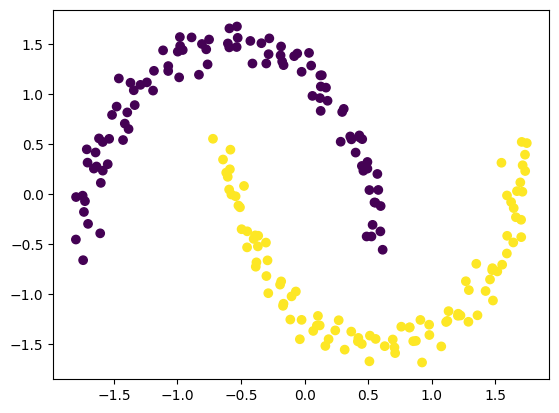

## 3.?. Visualization

In [ ]:
########## Precision-Recall Curve #############

from sklearn.metrics import precision_recall_curve
pred_prob = model.predict_proba(X_test)[:,1] # first col  is P(Y=0)
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")


################### ROC Curve ###################

from sklearn.metrics import roc_curve
pred_prob = model.predict_proba(X_test)[:,1] # first col  is P(Y=0)
FPR, TPR, threshold = roc_curve(y_test, pred_prob)

plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")


from sklearn.metrics import roc_auc_score # area under roc curve

# 4. Clustering 

In [ ]:
### KMeans, KMeans ++

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="kmeans++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show() # Now, we can find the optimal number of clusters using elbow method

# Suppose that n = 5 is the optimal number of cluster,
kmeans = KMeans(n_clusters=5, init='k-means++')
y_pred = kmeans.fit_predict(X)

# Now plotting all clusters as a scatter plot:
plt.scatter(X[y_pred==0,0],X[y_pred==0:,1], s=.., c=..,label=..)
# Similarly fir other classes with y_pred==1,2,3 ...



<a id='common'></a>
## 5.4. Common techniques

<a id='crossval'></a>
### 5.4.1. Cross validation

In [ ]:
######################## Cross Validation ###################################

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

####################### Other types of CV ###################################
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    StratifiedKFold,
    cross_validate,
    train_test_split)

# an ex:
# K-Fold Cross-Validation (CV schema)
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# estimate generalization error
clf = cross_validate(
    logit,
    X_train,
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=kf,  # k-fold
)

clf['test_score']

In [ ]:
############################ PCA ###########################
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Now you can use logistic regression

########################## Kernel PCA ########################
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

######################################## LDA ###########################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train) # we also have y here compared to PCA
X_test = lda.transform(X_test)

####################### Grid Search CV ######################################

from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.5,1], 'kernel':['linear']},
              {'C':[0.5,1], 'kernel':['rbf'], 'gammas': [0.2, 0.7]}]
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
################### ANN ####################

import TensorFlow as tf
ann = tf.keras.model.Sequential()

ann.add(tf.keras.layers.Dense(units = .., activation = ..))
ann.add ..
ann.add ..

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train)

#prediction:


<a id='functions'></a>
## A.1. Functions

In [2]:
def scores(y_true, y_pred):
    
    confusion = confusion_matrix(y_true, y_pred)
    confusion_percentages = confusion / confusion.sum(axis=1, keepdims=True) * 100
    confusion_percentages = np.around(confusion_percentages, decimals=2)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    f1 = f1_score(y_true, y_pred)
    
    print(f'Confusion Matrix:\n {confusion}\n'
          f'Confusion Matrix %:\n {confusion_percentages}\n'
          
          f'Accuracy: {accuracy:.2f}\n'
          f'Precision: {precision:.2f}\n'
          f'Recall: {recall:.2f}\n'
          f'Specificity: {specificity:.2f}\n'
          f'f1_score: {f1:.2f}\n'
    ) 

<a id='metric'></a>
# A.2. Crate your own metric

In [4]:
# Define the function:
def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    FNR = fn / (tp + fn)
    return FNR

# Put it in make_scorer
from sklearn.metrics import make_scorer
fnr_score = make_scorer(
    fnr,
    greater_is_better=False, # smaller is better
    needs_proba=False, # whether it takes a class of a probability
)

# Now, you can use it like:
clf = GridSearchCV(rf_model,
                   rf_param_grid,
                   scoring=fnr_score,
                   cv=5)

search = clf.fit(X, y)
search.best_params_
#################################################
### Now, ex with ptobability:

def fnr(y_true, y_pred):
    y_pred_class = np.where(y_pred > 0.37, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class, labels=[0, 1]).ravel()
    FNR = fn / (tp + fn)
    return FNR

fnr_score = make_scorer(
    fnr,
    greater_is_better=False,  # smaller is better
    needs_proba=True  # whether it takes a class of a probability
)
## Rest is similar

